In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZxtOLbpl4GbIw0wzxbg0")
project = rf.workspace("aa-6o2g6").project("object-detection-bckyl")
version = project.version(3)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-detection-3 in yolov8-obb:: 100%|██████████| 168/168 [00:00<00:00, 8439.45it/s]


In [10]:
# Basic libraries
import os
import numpy as np
import matplotlib.pyplot as plt
!pip install ultralytics

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import layers, models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO

# 1. Load a pre-trained YOLOv8-OBB model (Transfer Learning)
# 'n' stands for 'nano' - it's fast and lightweight
model = YOLO('yolov8n-obb.pt')

# 2. Train the model
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,

    # EARLY STOPPING
    patience=5,   # Stop if no improvement for 5 epochs in a row
    save=True,     # Ensure the best model is saved
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/object-detection-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=Tru

In [15]:
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.25,
    save= True
)



image 1/3 /content/object-detection-3/test/images/hand11xray_08613_png_jpg.rf.ef14bac691833b308283c5d75e41e257.jpg: 640x640 1 HandCuff, 15.5ms
image 2/3 /content/object-detection-3/test/images/hand13xray_08635_png_jpg.rf.47fff403540f101e80d3e4cc09dd67ff.jpg: 640x640 1 HandCuff, 13.2ms
image 3/3 /content/object-detection-3/test/images/knife1xray_08305_png_jpg.rf.7bb8d563ef812d8b0a0e2fe16ca47927.jpg: 640x640 1 knife, 12.7ms
Speed: 3.7ms preprocess, 13.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict


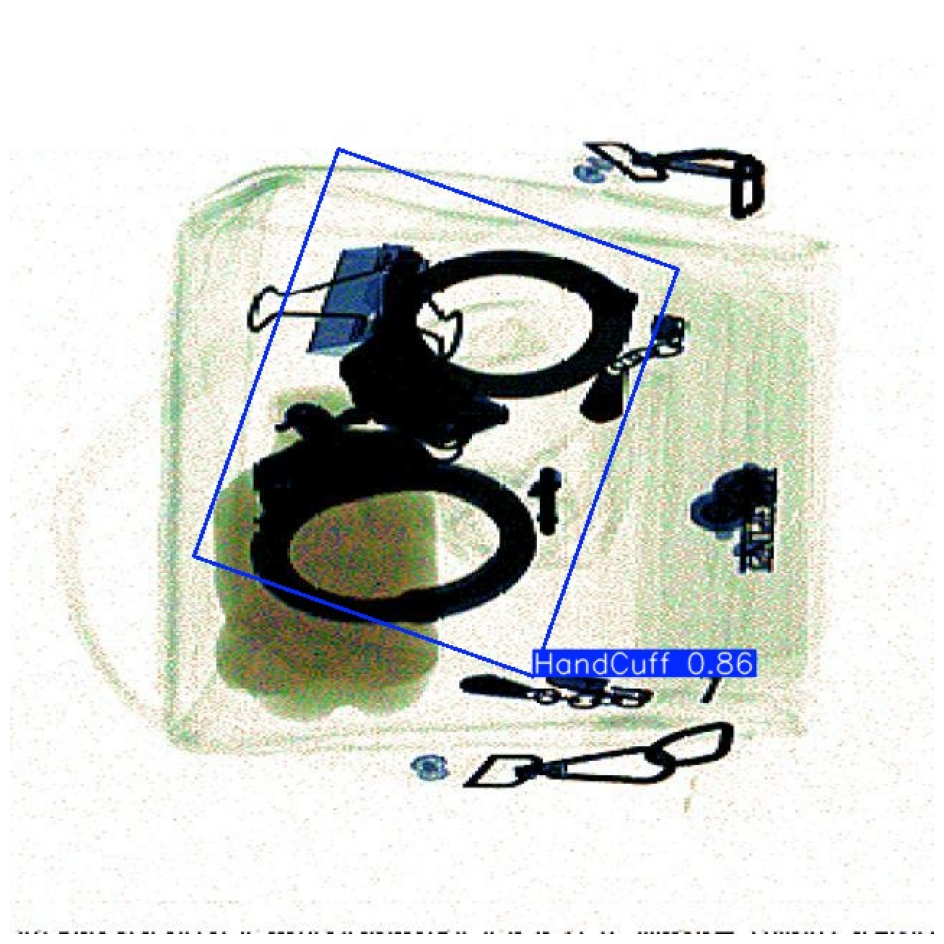

In [16]:
import matplotlib.pyplot as plt
import cv2
import glob

# Find the latest prediction folder
latest_folder = max(glob.glob('runs/obb/predict*/'), key=os.path.getmtime)
# Get the first image in that folder
image_path = glob.glob(f"{latest_folder}/*.jpg")[0]

# Display it
img = cv2.imread(image_path)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



0: 640x640 1 HandCuff, 5.9ms
1: 640x640 1 HandCuff, 5.9ms
2: 640x640 1 knife, 5.9ms
Speed: 2.4ms preprocess, 5.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


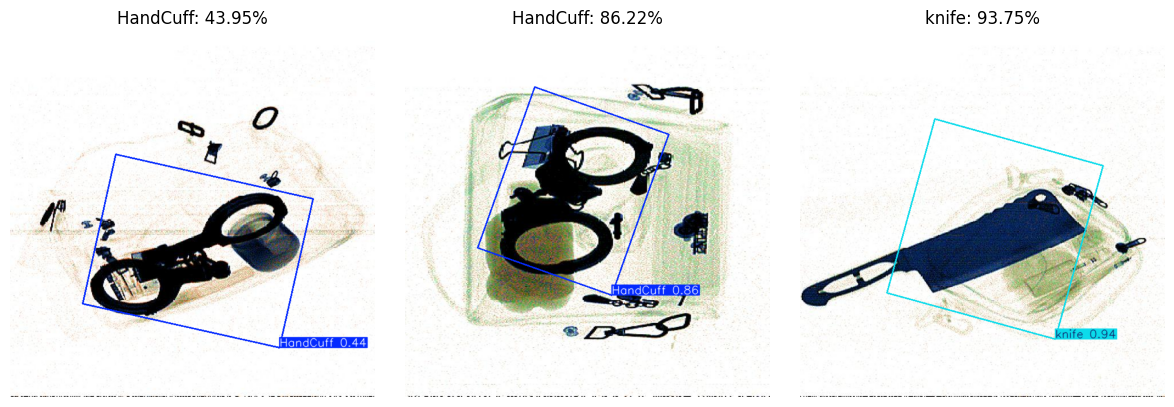

In [20]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# 1. Get a list of all test images
test_image_dir = f"{dataset.location}/test/images"
test_images = [os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# 2. Pick a sample of images, ensuring not to exceed the available images
num_samples = min(10, len(test_images)) # Ensure we don't try to sample more than available
sample_images = random.sample(test_images, num_samples)

# 3. Run prediction on these sample images
results = model.predict(
    source=sample_images,
    conf=0.25,
    save=False # Do not save images to disk, we will plot them directly
)

# 4. Plot the results in a grid dynamically adjusting based on num_samples
# Calculate grid dimensions: aiming for a reasonable layout
if num_samples > 0:
    num_cols = min(5, num_samples) # Max 5 columns for better viewing
    num_rows = (num_samples + num_cols - 1) // num_cols # Calculate rows needed
else:
    num_cols = 1
    num_rows = 1

plt.figure(figsize=(num_cols * 4, num_rows * 4))

if not sample_images:
    plt.text(0.5, 0.5, "No test images found.", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.axis('off')
else:
    for i, result in enumerate(results):
        img = result.plot() # This draws the boxes and labels on the image automatically
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_rgb)

        # Get the highest probability (confidence) found in this image
        if len(result.obb.conf) > 0:
            max_prob = float(result.obb.conf.max())
            class_id = int(result.obb.cls[result.obb.conf.argmax()])
            class_name = result.names[class_id]
            plt.title(f"{class_name}: {max_prob:.2%}")
        else:
            plt.title("No objects detected")

        plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
from ultralytics import YOLO

model = YOLO("/content/runs/obb/train/weights/best.pt")

In [23]:
import gradio as gr
from ultralytics import YOLO
import cv2


def detect(image):
    results = model(image, conf=0.25)
    annotated_img = results[0].plot()
    return annotated_img

interface = gr.Interface(
    fn=detect,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Image(type="numpy"),
    title="YOLOv8 Object Detection",
    description="Upload an image to detect objects"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e7e837f9308a78039.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
